In [15]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [16]:
data=pd.read_csv("Mall_Customers.csv")

In [17]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0,Gender_1
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_0,-0.057400,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_1,0.057400,0.060867,0.056410,-0.058109,-1.000000,1.000000


In [20]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})


In [23]:
# Exclude the 'Gender' column and calculate the correlation matrix
correlation_matrix = data.drop(columns=['Gender']).corr()

# Display the result
print(correlation_matrix)


                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [24]:
data = pd.get_dummies(data, columns=['Gender'])


<ipython-input-26-96e0c461133b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

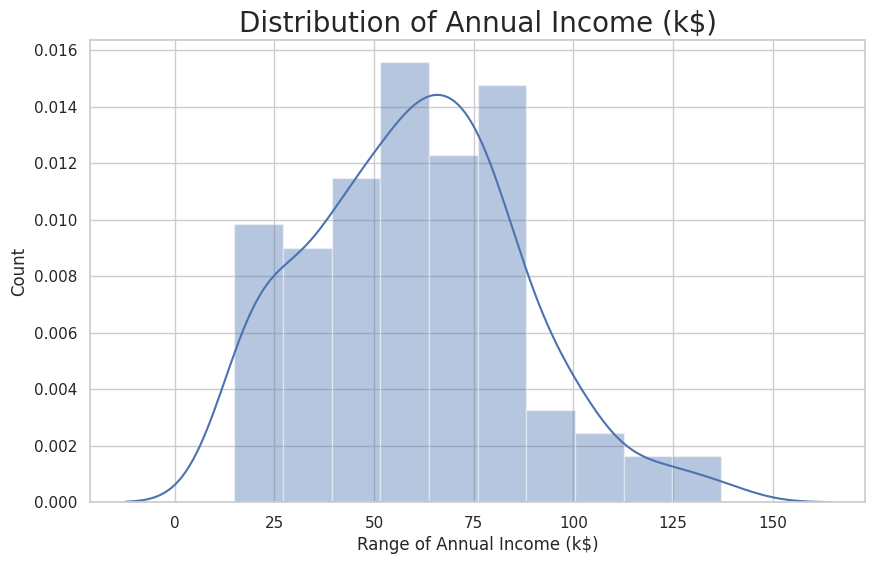

In [26]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

In [27]:
print(data.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_0  \
0           1   19                  15                      39     False   
1           2   21                  15                      81     False   
2           3   20                  16                       6      True   
3           4   23                  16                      77      True   
4           5   31                  17                      40      True   

   Gender_1  
0      True  
1      True  
2     False  
3     False  
4     False  


<ipython-input-28-d32a8f494b26>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0, 0.5, 'Count')

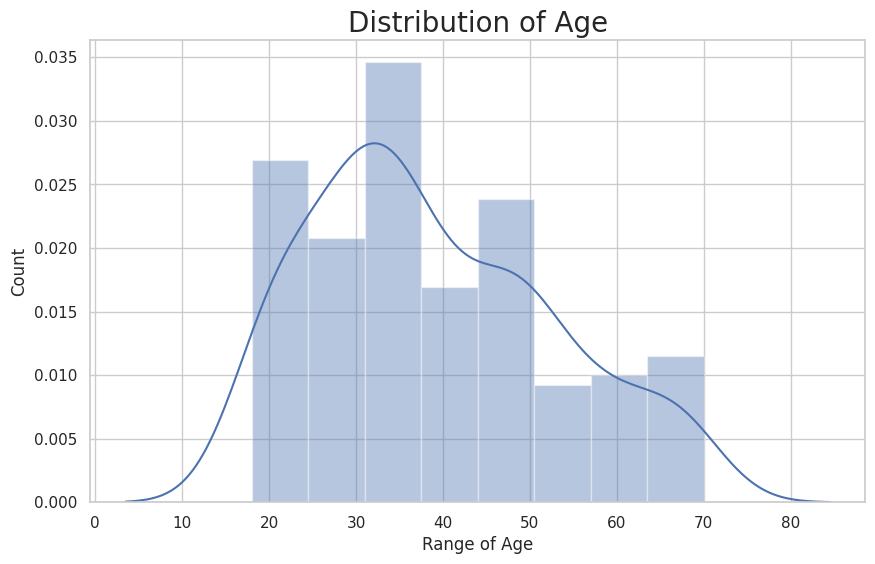

In [28]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

<ipython-input-29-eb221ddf9fa4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

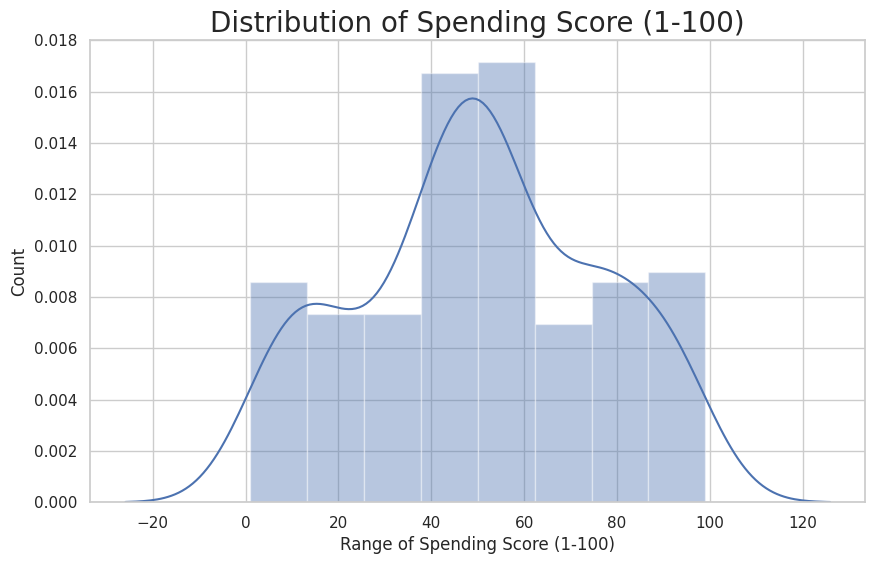

In [29]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

In [35]:
if "Gender" in data.columns:
    genders = data["Gender"].value_counts()
    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 4))
    sns.barplot(x=genders.index, y=genders.values)
    plt.title("Count of Customers by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()
else:
    print("Gender column not found in the dataset.")


Gender column not found in the dataset.


In [37]:
# Check available columns
print(data.columns)

# Adjust the column selection based on the actual dataset
columns_to_select = ["CustomerID", "Age", "Annual Income (k$)", "Spending Score (1-100)"]

if "Gender" in data.columns:
    columns_to_select.insert(1, "Gender")  # Add Gender if it exists

ssdf1 = data[columns_to_select]
X = ssdf1[["Annual Income (k$)", "Spending Score (1-100)"]]
print(ssdf1.head())


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_0', 'Gender_1'],
      dtype='object')
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


In [38]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


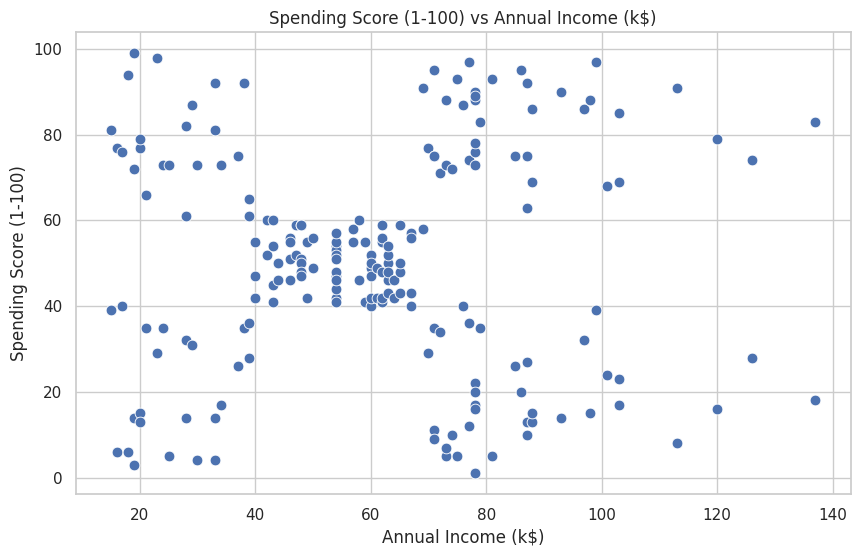

In [39]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


In [40]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [41]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

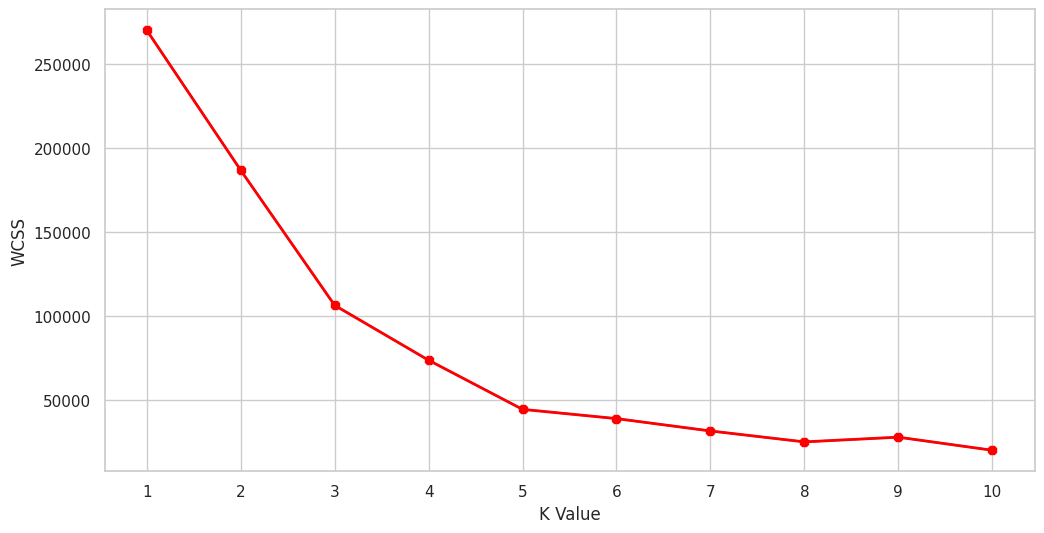

In [42]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [44]:
# Subset the data for clustering
if "Gender" in data.columns:
    df1 = data[["CustomerID", "Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
else:
    df1 = data[["CustomerID", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Features for clustering
X = df1[["Annual Income (k$)", "Spending Score (1-100)"]]

# Perform K-Means clustering
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=3, random_state=42)
y = km1.fit_predict(X)

# Add cluster labels to the DataFrame
df1["label"] = y

# Display the first few rows of the updated DataFrame
print(df1.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  label
0           1   19                  15                      39      2
1           2   21                  15                      81      2
2           3   20                  16                       6      2
3           4   23                  16                      77      2
4           5   31                  17                      40      2


<ipython-input-44-859f66debd5d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = y


<ipython-input-45-20cc8b3ed011>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",


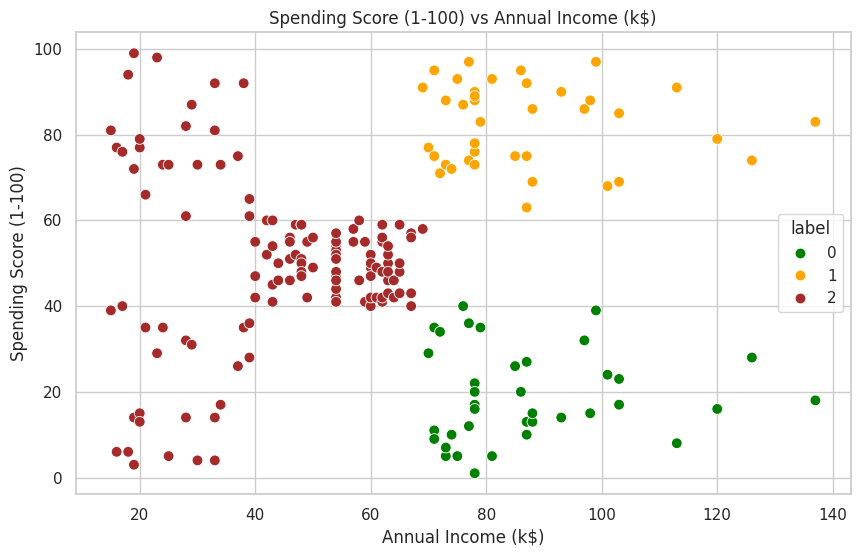

In [45]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


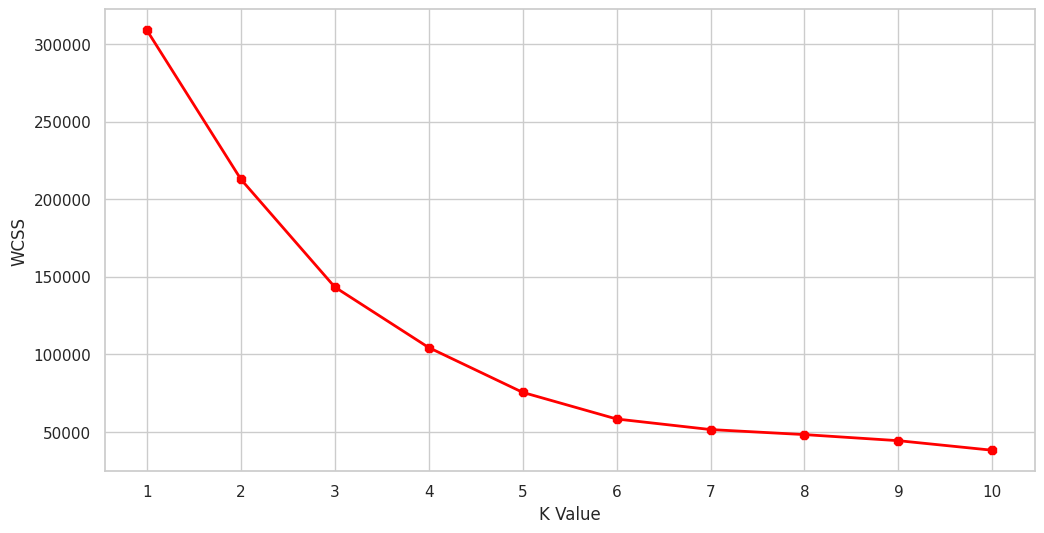

In [46]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [47]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

<ipython-input-47-710b59e04d05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = y2


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,3
1,2,21,15,81,7
2,3,20,16,6,4
3,4,23,16,77,7
4,5,31,17,40,3


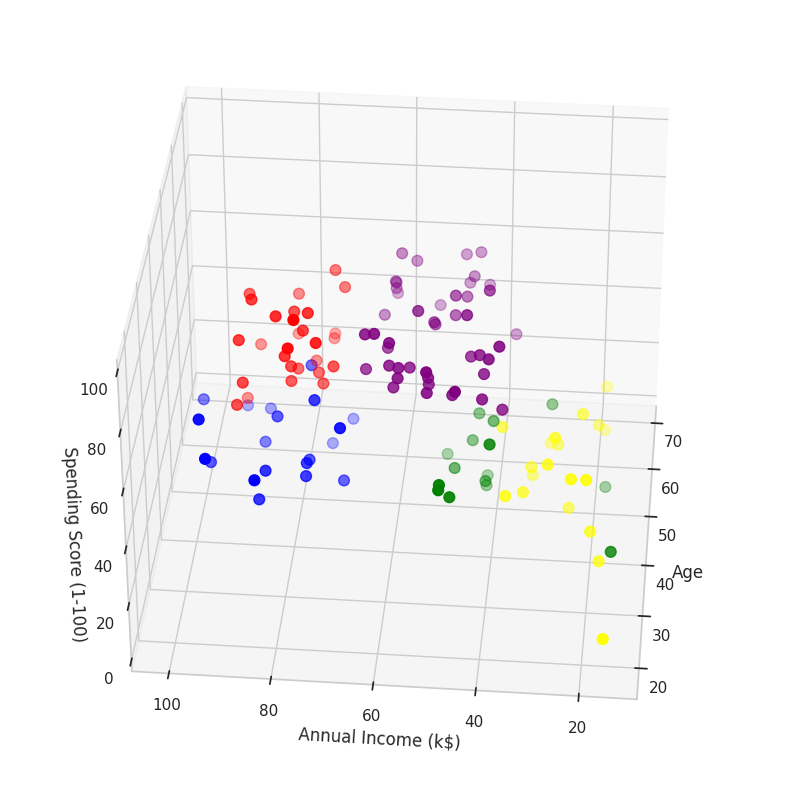

In [48]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [49]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")


Number of customer in 1st group= 28
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 2nd group= 20
They are - [127 129 131 141 147 151 153 155 161 165 167 169 171 175 177 179 181 183
 185 187]
--------------------------------------------
Number of customer in 3rd group= 45
They are - [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]
--------------------------------------------
Number of customer in 4th group= 15
They are - [ 1  5 28 44 46 48 49 50 52 53 59 62 66 69 70]
--------------------------------------------
Number of customer in 5th group= 19
They are - [ 3  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
--------------------------------------------


In [51]:
from sklearn.cluster import KMeans

# Subset the data for clustering
X = df1[["Annual Income (k$)", "Spending Score (1-100)"]]

# Initialize and fit the KMeans model
km2 = KMeans(n_clusters=3, random_state=42)
km2.fit(X)

# Print Inertia
print(f"Inertia (Within-Cluster Sum of Squares): {km2.inertia_:.2f}")


Inertia (Within-Cluster Sum of Squares): 106348.37


In [52]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, km2.labels_)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.47
